# Задание 3

# Бинарная классификация

**Цель работы:** познакомиться с применением модели машинного обучения для решения задачи классификации (метод логистической регрессии)

Проанализируем датасет wine. Датасет содержит сведения о различных винах. Также он содержит информацию о том, является ли вино красным или белым. Смысл задачи - определять, основываясь на этих данных, является ли вино красным или белым. Набор включает следующие атрибуты:

* **fixed acidity** – уровень кислотности в вине
* **volatile acidity** – количество уксусной кислоты, присутствующей в вине
* **citric acid** – количество лимонной кислоты, присутствующей в вине
* **residual sugar** – количество сахара после ферментации
* **chlorides** – количество солей, присутствующих в вине
* **free sulfur dioxide** – количество SO2 в свободной форме
* **total sulfur dioxide** – количество свободных и связанных форм SO2
* **density** – плотность вина (масса/объем)
* **pH** – значение рН вина в диапазоне от 0 до 14
* **sulphates** – уровень содержания диоксида серы (SO2) в вине
* **alcohol** – количество алкоголя, присутствующего в вине
* **quality** – конечное качество упомянутого вина
* **type** – тип вина (красное, белое) – целевая переменная

## Импортируем библиотеки и загружаем данные

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [26]:
df = pd.read_csv("wine.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,red


Выведем целевую переменную, целевые имена и частоту каждого уникального значения:

In [27]:
(unique, counts) = np.unique(df["type"], return_counts=True)
print("Unique values of the target variable: ", unique)
print("Counts of the target variable: ", counts)

Unique values of the target variable:  ['red' 'white']
Counts of the target variable:  [1599 4898]


Построим столбчатую диаграмму, чтобы увидеть целевую переменную:

<Axes: xlabel='type', ylabel='count'>

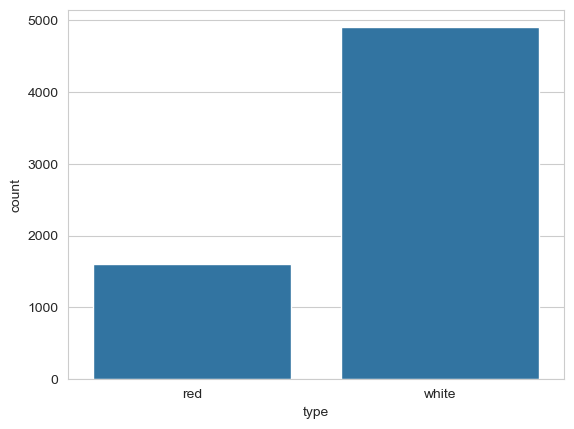

In [28]:
sns.set_style("whitegrid")
sns.countplot(df, x="type")

Анализ диаграммы показывает, что набор данных является сбалансированным

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         6497 non-null   float64
 1   volatile acidity      6497 non-null   float64
 2   citric acid           6497 non-null   float64
 3   residual sugar        6497 non-null   float64
 4   chlorides             6497 non-null   float64
 5   free sulfur dioxide   6497 non-null   float64
 6   total sulfur dioxide  6497 non-null   float64
 7   density               6497 non-null   float64
 8   pH                    6497 non-null   float64
 9   sulphates             6497 non-null   float64
 10  alcohol               6497 non-null   float64
 11  quality               6497 non-null   int64  
 12  type                  6497 non-null   object 
dtypes: float64(11), int64(1), object(1)
memory usage: 660.0+ KB


В этом наборе данных у нас есть два класса: red и white, что по сути делает эту задачу задачей бинарной классификации

Выполним бинарную классификацию с использованием логистической регрессии с помощью sklearn

## Проверяем наличие пропущенных значений и выбросов

In [30]:
# проверяем на пропущенные значения
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
type                    0
dtype: int64

<Axes: xlabel='density'>

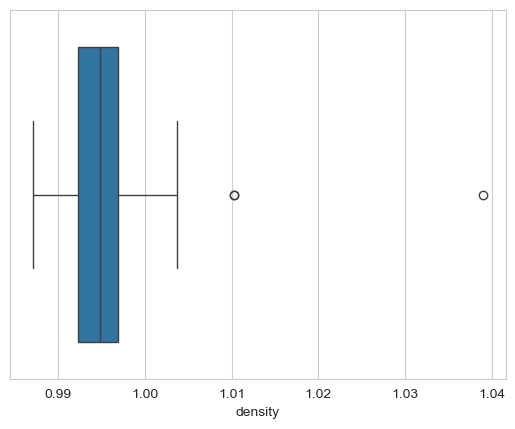

In [31]:
# проверяем на выбросы
sns.boxplot(x=df["density"])

## Исключаем невлияющие категориальные признаки

In [32]:
df_copy = df.copy()
cat_feat = ["quality"]
df_copy.drop(cat_feat, axis=1, inplace=True)
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,red
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,red
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,red
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,red


Признак type имеет два значения - red и white. Этот признак, по сути, бинарный и можно использовать значения значения на 0 и 1

In [33]:
binary_type = {"red": 1, "white": 0}
df_copy["type"] = df_copy["type"].map(binary_type)
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,1


In [34]:
# проверяем на пропущенные значения
df_copy.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
type                    0
dtype: int64

In [35]:
df_copy["free sulfur dioxide"] = df_copy["free sulfur dioxide"].astype("int64")
df_copy["total sulfur dioxide"] = df_copy["total sulfur dioxide"].astype("int64")
df_copy.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
0,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1
1,7.8,0.88,0.00,2.6,0.098,25,67,0.9968,3.20,0.68,9.8,1
2,7.8,0.76,0.04,2.3,0.092,15,54,0.9970,3.26,0.65,9.8,1
3,11.2,0.28,0.56,1.9,0.075,17,60,0.9980,3.16,0.58,9.8,1
4,7.4,0.70,0.00,1.9,0.076,11,34,0.9978,3.51,0.56,9.4,1


## Разделяем данные на признаки и целевую переменную

In [36]:
y = df_copy["type"]
X = df_copy.drop("type", axis=1)
X

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4
1,7.8,0.88,0.00,2.6,0.098,25,67,0.99680,3.20,0.68,9.8
2,7.8,0.76,0.04,2.3,0.092,15,54,0.99700,3.26,0.65,9.8
3,11.2,0.28,0.56,1.9,0.075,17,60,0.99800,3.16,0.58,9.8
4,7.4,0.70,0.00,1.9,0.076,11,34,0.99780,3.51,0.56,9.4
...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24,92,0.99114,3.27,0.50,11.2
6493,6.6,0.32,0.36,8.0,0.047,57,168,0.99490,3.15,0.46,9.6
6494,6.5,0.24,0.19,1.2,0.041,30,111,0.99254,2.99,0.46,9.4
6495,5.5,0.29,0.30,1.1,0.022,20,110,0.98869,3.34,0.38,12.8


## Применяем операцию нормализации для численной устойчивости

In [37]:
from sklearn.preprocessing import StandardScaler
standardizer = StandardScaler()
X = standardizer.fit_transform(X)
X

array([[ 0.14247327,  2.18883292, -2.19283252, ...,  1.81308951,
         0.19309677, -0.91546416],
       [ 0.45103572,  3.28223494, -2.19283252, ..., -0.11507303,
         0.99957862, -0.58006813],
       [ 0.45103572,  2.55330026, -1.91755268, ...,  0.25811972,
         0.79795816, -0.58006813],
       ...,
       [-0.55179227, -0.6054167 , -0.88525328, ..., -1.42124765,
        -0.47897144, -0.91546416],
       [-1.32319841, -0.30169391, -0.12823371, ...,  0.75571005,
        -1.016626  ,  1.9354021 ],
       [-0.93749534, -0.78765037,  0.42232597, ...,  0.25811972,
        -1.41986693,  1.09691202]])

## Разделяем данные на тренировочный и тестовый наборы
75% данных используется для обучения и 25% - для тестирования.

In [38]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

## Обучаем модель логистической регрессии

In [39]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

## Делаем прогноз на основе данных тестирования

In [40]:
y_pred = model.predict(X_test)

## Рассчитываем показатели точности, сравнив фактические и прогнозируемые значения

In [41]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)
TN, FP, FN, TP = confusion_matrix(y_test, y_pred).ravel()

print("True Positive(TP) = ", TP)
print("False Positive(FP) = ", FP)
print("True Negative(TN) = ", TN)
print("False Negative(FN) = ", FN)

accuracy = (TP+TN) / (TP+FP+TN+FN)
print("Accuracy of the binary classification = {:0.3f}".format(accuracy))

True Positive(TP) =  388
False Positive(FP) =  5
True Negative(TN) =  1228
False Negative(FN) =  4
Accuracy of the binary classification = 0.994


In [42]:
# оцениваем точность модели
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: ", accuracy)

Accuracy:  0.9944615384615385


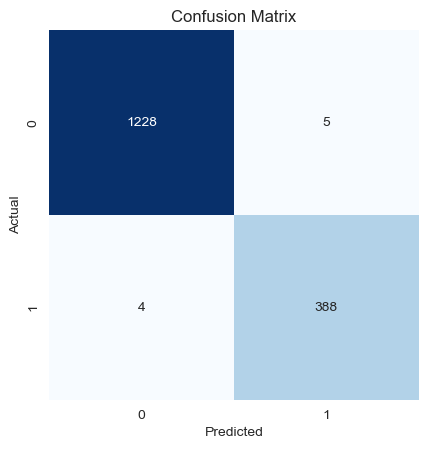

In [43]:
sns.heatmap(cm, square=True, annot=True, fmt="d", cbar=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

In [45]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Точность: {accuracy:.2f}")

Точность: 0.99


In [44]:
from sklearn.metrics import precision_score, recall_score
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
print(f"Точность: {precision:.2f}")
print(f"Полнота: {recall:.2f}")

Точность: 0.99
Полнота: 0.99


In [47]:
from sklearn.metrics import f1_score
f1 = f1_score(y_test, y_pred)
print(f"F1-мера: {f1:.2f}")

F1-мера: 0.99


In [48]:
df_copy.corr()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,type
fixed acidity,1.000000,0.219008,0.324436,-0.111981,0.298195,-0.282815,-0.329064,0.458910,-0.252700,0.299568,-0.095452,0.486740
volatile acidity,0.219008,1.000000,-0.377981,-0.196011,0.377124,-0.352580,-0.414489,0.271296,0.261454,0.225984,-0.037640,0.653036
citric acid,0.324436,-0.377981,1.000000,0.142451,0.038998,0.133130,0.195254,0.096154,-0.329808,0.056197,-0.010493,-0.187397
residual sugar,-0.111981,-0.196011,0.142451,1.000000,-0.128940,0.402873,0.495485,0.552517,-0.267320,-0.185927,-0.359415,-0.348821
chlorides,0.298195,0.377124,0.038998,-0.128940,1.000000,-0.195136,-0.279654,0.362615,0.044708,0.395593,-0.256916,0.512678
free sulfur dioxide,-0.282815,-0.352580,0.133130,0.402873,-0.195136,1.000000,0.720787,0.025617,-0.145871,-0.188521,-0.179773,-0.471706
total sulfur dioxide,-0.329064,-0.414489,0.195254,0.495485,-0.279654,0.720787,1.000000,0.032376,-0.238424,-0.275732,-0.265726,-0.700381
density,0.458910,0.271296,0.096154,0.552517,0.362615,0.025617,0.032376,1.000000,0.011686,0.259478,-0.686745,0.390645
pH,-0.252700,0.261454,-0.329808,-0.267320,0.044708,-0.145871,-0.238424,0.011686,1.000000,0.192123,0.121248,0.329129
sulphates,0.299568,0.225984,0.056197,-0.185927,0.395593,-0.188521,-0.275732,0.259478,0.192123,1.000000,-0.003029,0.487218


## Строим ROC-кривую

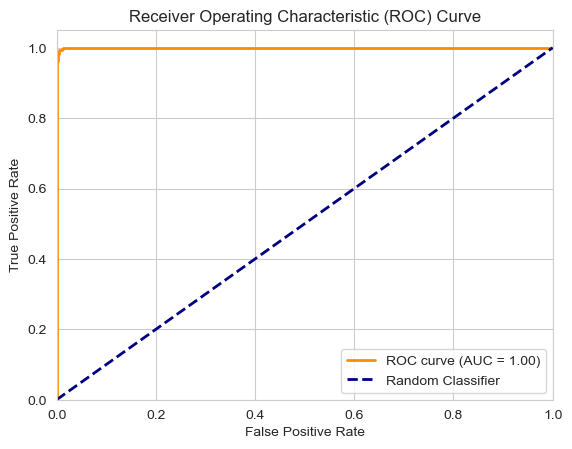

In [50]:
from sklearn.metrics import roc_curve, auc

# Получаем предсказанные вероятности для класса 1
y_score = model.predict_proba(X_test)[:, 1]

# Рассчитываем FPR, TPR и пороги
fpr, tpr, thresholds = roc_curve(y_test, y_score)

# (Опционально) Рассчитываем AUC (Area Under Curve) - площадь под кривой
roc_auc = auc(fpr, tpr)

# Строим график
plt.figure()
plt.plot(fpr, tpr, color="darkorange", lw=2, label=f"ROC curve (AUC = {roc_auc:.2f})")

plt.plot([0, 1], [0, 1], color="navy", lw=2, linestyle="--", label="Random Classifier")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC) Curve")
plt.legend(loc="lower right")
plt.grid(True)
plt.show()